<a href="https://colab.research.google.com/github/CSID-DGU/2021-1-OSSP1-Debugger-4/blob/face-recognization/facecrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

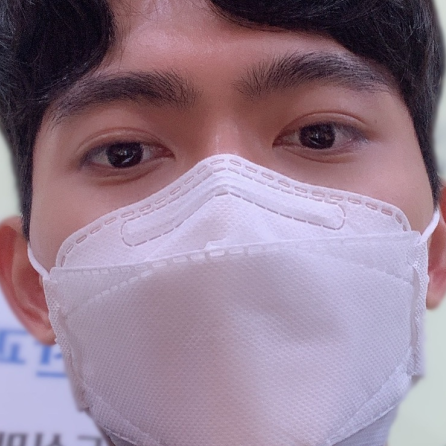

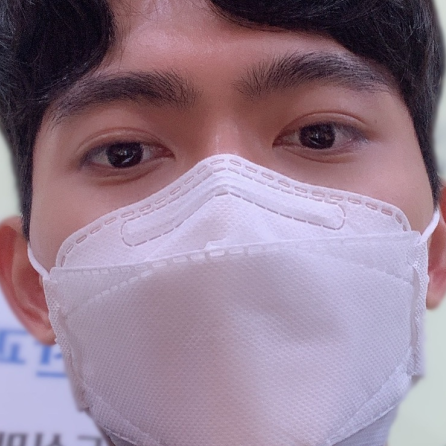

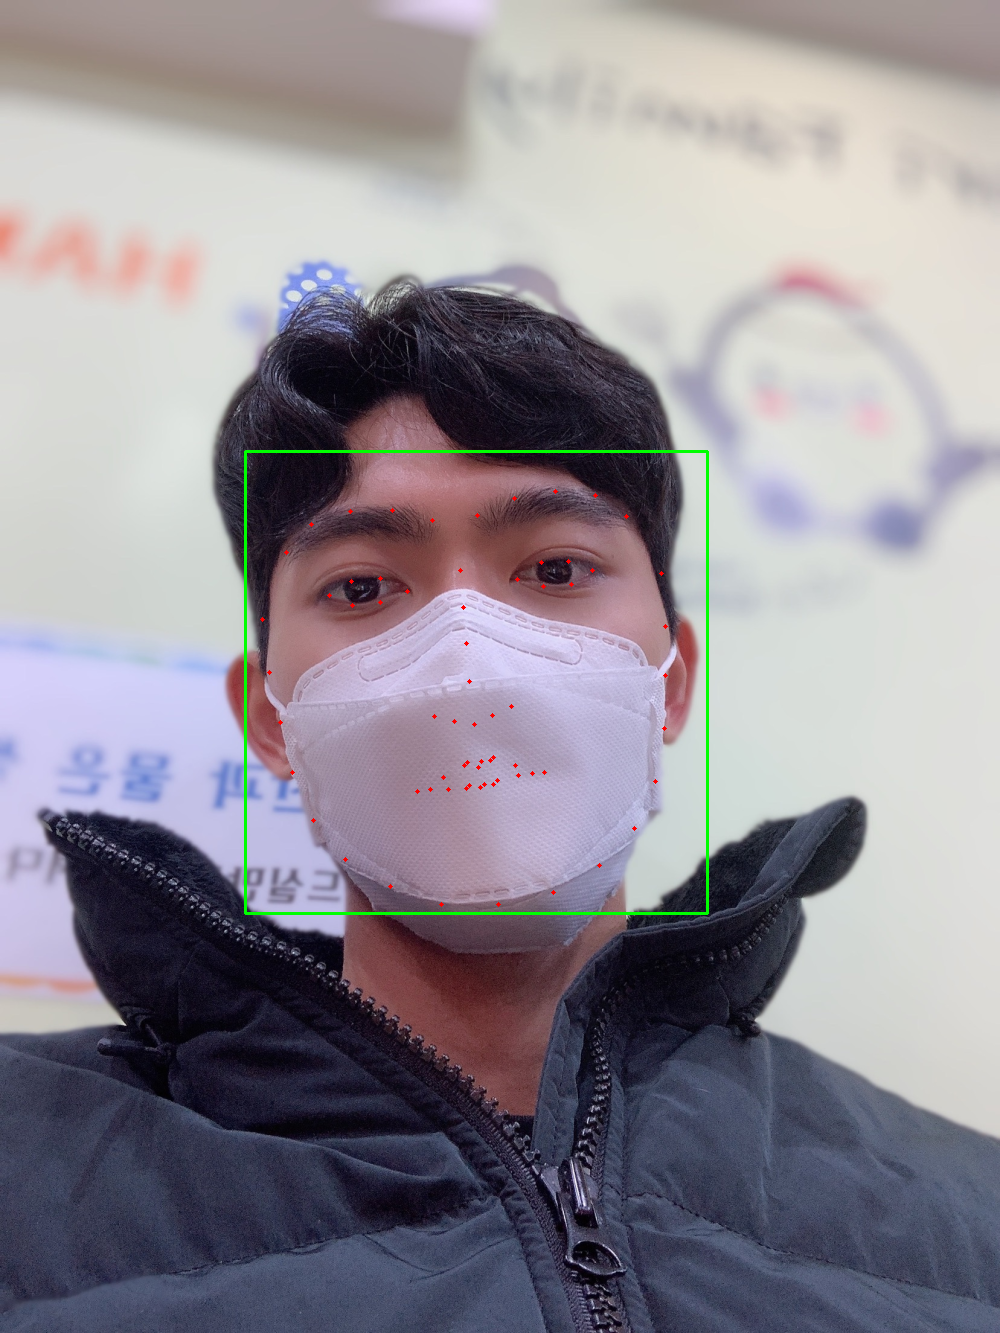

{0: [262, 619], 1: [269, 672], 2: [280, 722], 3: [292, 772], 4: [313, 820], 5: [345, 859], 6: [390, 886], 7: [441, 904], 8: [498, 904], 9: [553, 892], 10: [599, 865], 11: [634, 828], 12: [655, 781], 13: [664, 728], 14: [665, 675], 15: [665, 626], 16: [661, 573], 17: [286, 552], 18: [311, 524], 19: [350, 511], 20: [392, 510], 21: [432, 520], 22: [477, 515], 23: [514, 498], 24: [555, 491], 25: [595, 495], 26: [626, 516], 27: [460, 570], 28: [463, 607], 29: [466, 643], 30: [469, 681], 31: [434, 716], 32: [454, 721], 33: [474, 724], 34: [492, 715], 35: [511, 706], 36: [329, 595], 37: [351, 581], 38: [380, 578], 39: [407, 591], 40: [380, 602], 41: [352, 605], 42: [517, 579], 43: [541, 562], 44: [568, 561], 45: [592, 570], 46: [571, 584], 47: [543, 586], 48: [417, 791], 49: [443, 777], 50: [464, 765], 51: [478, 767], 52: [490, 760], 53: [515, 765], 54: [544, 772], 55: [518, 775], 56: [497, 780], 57: [484, 784], 58: [469, 785], 59: [448, 789], 60: [430, 789], 61: [466, 788], 62: [480, 787], 6

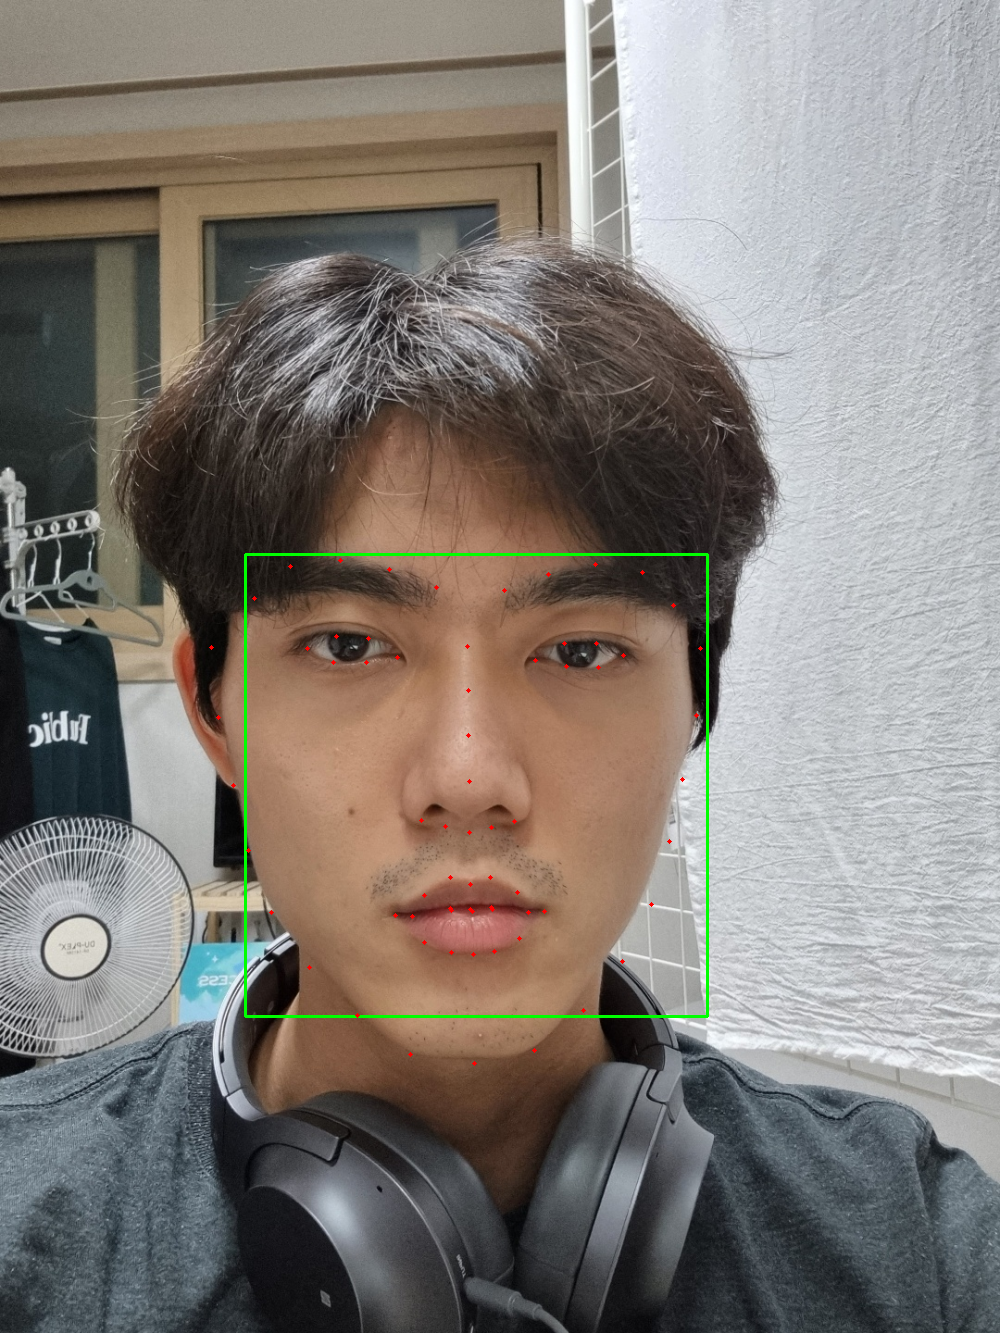

{0: [211, 647], 1: [218, 717], 2: [233, 785], 3: [248, 850], 4: [271, 912], 5: [309, 967], 6: [357, 1015], 7: [410, 1054], 8: [474, 1063], 9: [534, 1050], 10: [583, 1010], 11: [622, 961], 12: [651, 904], 13: [669, 841], 14: [682, 779], 15: [696, 715], 16: [700, 648], 17: [254, 598], 18: [290, 566], 19: [340, 560], 20: [389, 569], 21: [436, 587], 22: [504, 590], 23: [548, 574], 24: [595, 564], 25: [642, 572], 26: [673, 605], 27: [467, 646], 28: [468, 690], 29: [468, 735], 30: [469, 781], 31: [421, 820], 32: [445, 826], 33: [469, 832], 34: [491, 827], 35: [514, 821], 36: [307, 648], 37: [336, 636], 38: [368, 638], 39: [397, 657], 40: [366, 662], 41: [333, 662], 42: [535, 660], 43: [564, 643], 44: [596, 643], 45: [623, 655], 46: [598, 667], 47: [566, 666], 48: [395, 915], 49: [424, 895], 50: [450, 877], 51: [470, 884], 52: [490, 877], 53: [517, 892], 54: [544, 911], 55: [519, 938], 56: [494, 951], 57: [473, 954], 58: [451, 952], 59: [424, 942], 60: [412, 916], 61: [450, 908], 62: [470, 90

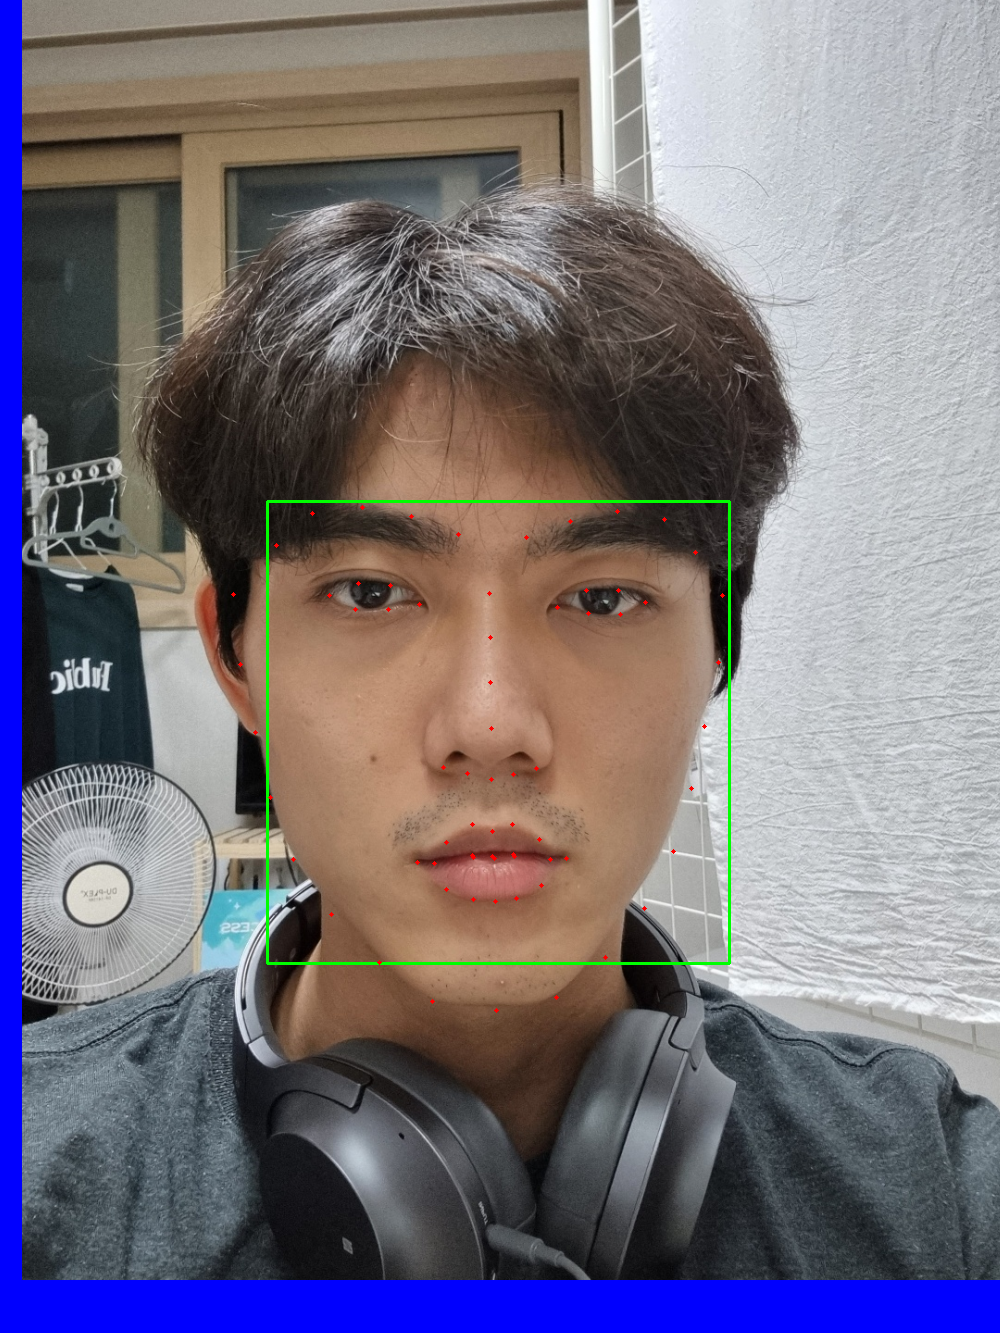

-0.0294999957619445
0.05006623480614484


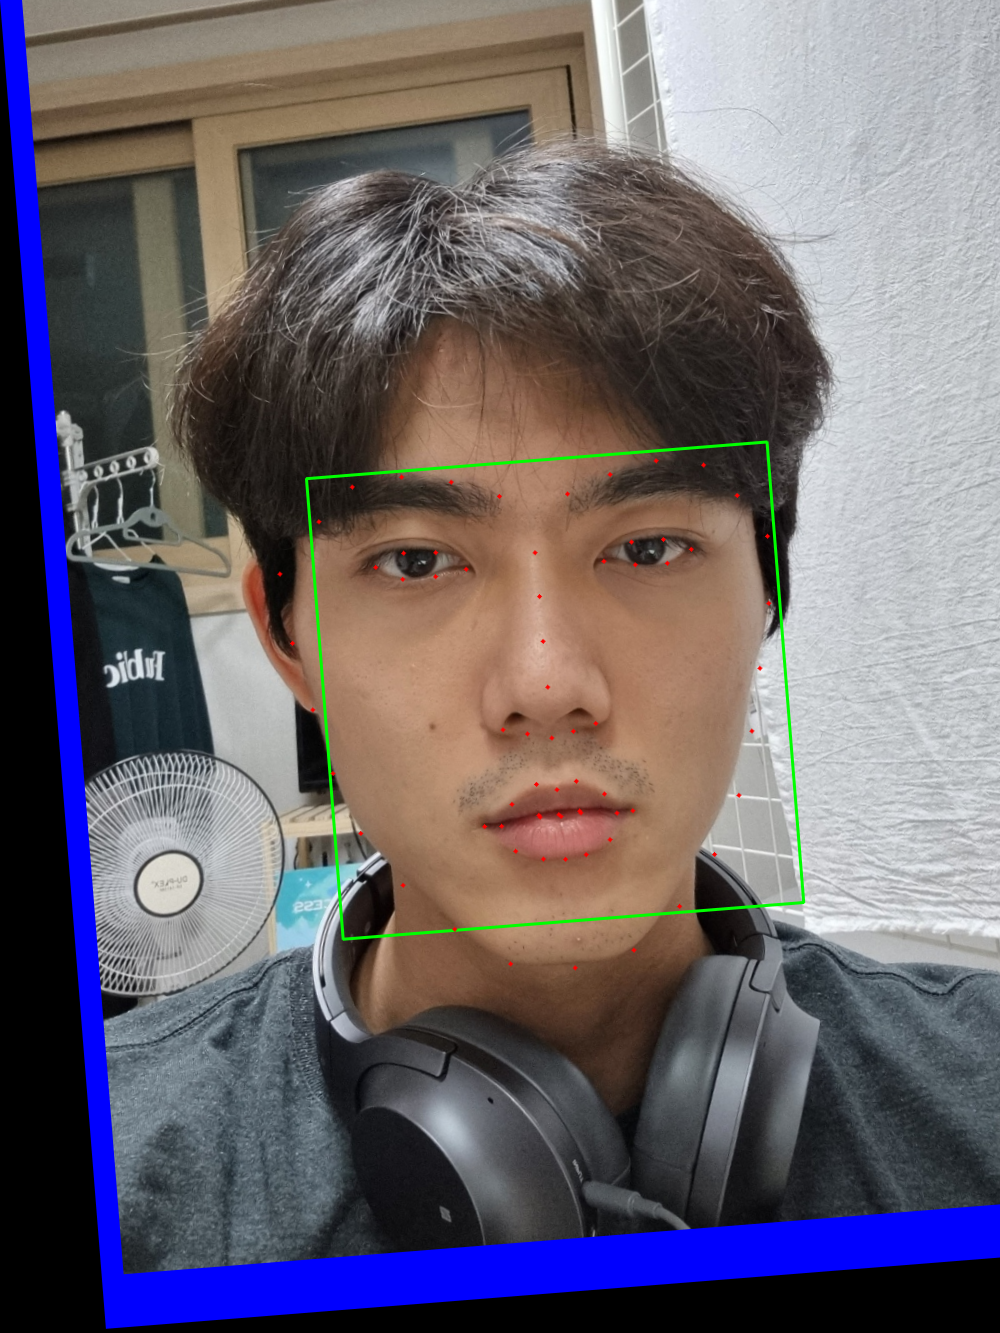

ValueError: ignored

In [44]:
from imutils import face_utils
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import dlib
import cv2
import math

ALL = list(range(0, 68))
RIGHT_EYEBROW = list(range(17, 22))
LEFT_EYEBROW = list(range(22, 27))
RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
NOSE = list(range(27, 36))
MOUTH_OUTLINE = list(range(48, 61))
MOUTH_INNER = list(range(61, 68))
JAWLINE = list(range(0, 17))

landmark_list1 = []
landmark_list2 = []
landmark_list3 = []

def show_raw_detection(image, detector, predictor, landmark_list):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # detect faces in the grayscale image
  rects = detector(gray, 1)

  # loop over the face detections
  for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then 
    # convert the facial landmark (x, y)-coordinates to a NumPy 
    # array 
    shape = predictor(gray, rect) 
    shape = face_utils.shape_to_np(shape)
  
    # convert dlib's rectangle to a OpenCV-style bounding box 
    # [i.e., (x, y, w, h)], then draw the face bounding box 
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2) 
  
    # show the face number
    #cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
      landmark_list.append([x, y])
      cv2.circle(image, (x, y), 2, (0, 0, 255), -1) 
    
  # show the output image with the face detections + facial landmarks
  cv2_imshow(image)
  #cv2.waitKey(0)
  
    
# initialize dlib's face detector (HOG-based) and then create 
# the facial landmark predictor 
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/gdrive/MyDrive/shape_predictor_68_face_landmarks.dat')

# load the input image, resize it, and convert it to grayscale
image1 = cv2.imread('/gdrive/MyDrive/face1.JPG')
image1 = imutils.resize(image1, width=1000)
show_raw_detection(image1, detector, predictor, landmark_list1)

key_val = [ALL, landmark_list1]
landmark_dict = dict(zip(*key_val))
print(landmark_dict)
print(landmark_list1[36])

image2 = cv2.imread('/gdrive/MyDrive/face4.jpg')
image2 = imutils.resize(image2, width=1000)
show_raw_detection(image2, detector, predictor, landmark_list2)



key_val = [ALL, landmark_list2]
landmark_dict = dict(zip(*key_val))
print(landmark_dict)
print(landmark_list2[36])

#이미지 이동
dx = landmark_list1[36][0] - landmark_list2[36][0]
dy = landmark_list1[36][1] - landmark_list2[36][1]
print(dx)
print(dy)

mtrx = np.float32([[1,0,dx],
                  [0,1,dy]])
dst = cv2.warpAffine(image2, mtrx, (0+dx, 0+dy),None, cv2.INTER_LINEAR, cv2.BORDER_CONSTANT,(255,0,0))
cv2_imshow(dst)

#이미지 회전
r_image1 = math.atan2(landmark_list1[45][1]-landmark_list1[36][1],landmark_list1[45][0]-landmark_list1[36][1])
r_image2 = math.atan2(landmark_list2[45][1]-landmark_list2[36][1],landmark_list2[45][0]-landmark_list2[36][1])
d_1 = r_image1 * np.pi / 180
d_2 = r_image2 * np.pi / 180
print(d_1)
print(d_2)
d = d_1-d_2

rows, cols = image2.shape[0:2]
#m = np.float32( [[ np.cos(d), -1* np.sin(d), rows//2],
#                    [np.sin(d), np.cos(d), -1*cols//4]])
m = np.float32( [[ np.cos(d), -1* np.sin(d), 0],
                    [np.sin(d), np.cos(d), 0]])

r = cv2.warpAffine(dst,m,(0,0))
cv2_imshow(r)


for i in range(68):
  landmark_list3 = landmark_list2 * mtrx * m
 #landmark_list3[i] = landmark_list2[i] * mtrx * m

key_val = [ALL,landmark_list3]
landmark_dict = dict(zip(*key_val))
print(landmark_dict)
print(landmark_list3[36])
#show_raw_detection(r,detector,predictor, landmark_list3)
#key_val = [ALL, landmark_list1]
#landmark_dict = dict(zip(*key_val))
#print(landmark_dict)
#print(landmark_list3[36])
